In [1]:
import pandas as pd
import numpy as np
import optuna
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt



In [2]:
raw = pd.read_csv("Data Set/raw.csv")
test = pd.read_csv("Data Set/test.csv")
x = raw.iloc[:, 2:41]
x_train = x[:22000]
x_val = x[22000:]
y = raw.iloc[:, :2]
y_train = y[:22000]
y_val = y[22000:]
x_test = test.iloc[:, 2:41]
y_test = test.iloc[:, :2]

#I did this because in the documentation of the site which contained the dataset mentioned that the fuel value will range from 0.7 to 5%, So I modified the dataset from the numbers app changing the name of coloumns the first two were k-inf and pppf (the numbers app mentions the maxm and minm value and on the histogram on the documentation the maxm and minm was exact match with their type) respectively so I changes the coloumn name and rest were fuels. 


In [3]:
# the doumantaion says Hyp-RL has the maximum accuracy (not considring CASOH), but I was unable to setup hyp-rl don't know why. And the gpt says optuna is a good alternative Hyp-RL

def objective(trial):
    # Hyperparameters to tune
    num_units1 = trial.suggest_int("num_units1", 20,200, step = 30) #higher steps for less computational time
    num_units2 = trial.suggest_int("num_units2", 20,200 ,step = 30)
    epochs = trial.suggest_int("epochs", 50,200)
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
    learning_rate = trial.suggest_float("learning_rate", 0.0001, 0.1)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])

    # Build the model and I have taken 2 layers for less computational time
    model = Sequential()
    model.add(Dense(num_units1, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_units2, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2))  # Output layer for two outputs: Infinite Multiplication Factor and PPPF

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss="mse",metrics=["mse"])

    # Train the model
    model.fit(x_train, y_train,validation_data=(x_val, y_val),epochs=epochs,batch_size=batch_size, verbose=0)

    # Evaluate on the validation set
    y_pred = model.predict(x_val)
    val_mse = mean_squared_error(y_val, y_pred)

    return val_mse

# Run Optuna for hyperparameter optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50) 

# Best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)



[I 2025-01-27 17:37:24,076] A new study created in memory with name: no-name-4cbcdd8b-77e8-4784-95a9-797b75916aaa


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


[I 2025-01-27 17:37:46,860] Trial 0 finished with value: 0.007551882416009903 and parameters: {'num_units1': 140, 'num_units2': 80, 'epochs': 84, 'dropout_rate': 0.2958819985720689, 'learning_rate': 0.010055836019481054, 'batch_size': 32}. Best is trial 0 with value: 0.007551882416009903.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step


[I 2025-01-27 17:38:14,539] Trial 1 finished with value: 0.008211019448935986 and parameters: {'num_units1': 80, 'num_units2': 80, 'epochs': 189, 'dropout_rate': 0.1603958768192837, 'learning_rate': 0.04697152583498441, 'batch_size': 64}. Best is trial 0 with value: 0.007551882416009903.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step


[I 2025-01-27 17:38:29,596] Trial 2 finished with value: 0.0075575606897473335 and parameters: {'num_units1': 20, 'num_units2': 50, 'epochs': 190, 'dropout_rate': 0.30236033876065377, 'learning_rate': 0.0369802582833128, 'batch_size': 128}. Best is trial 0 with value: 0.007551882416009903.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


[I 2025-01-27 17:38:41,342] Trial 3 finished with value: 0.007597952615469694 and parameters: {'num_units1': 20, 'num_units2': 50, 'epochs': 50, 'dropout_rate': 0.22280718986331977, 'learning_rate': 0.04446044556450784, 'batch_size': 32}. Best is trial 0 with value: 0.007551882416009903.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


[I 2025-01-27 17:39:00,257] Trial 4 finished with value: 0.008309698663651943 and parameters: {'num_units1': 20, 'num_units2': 200, 'epochs': 75, 'dropout_rate': 0.44862757959465766, 'learning_rate': 0.09996419794811068, 'batch_size': 32}. Best is trial 0 with value: 0.007551882416009903.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


[I 2025-01-27 17:39:23,862] Trial 5 finished with value: 0.007550361566245556 and parameters: {'num_units1': 20, 'num_units2': 110, 'epochs': 98, 'dropout_rate': 0.36613720775105546, 'learning_rate': 0.004723987032723953, 'batch_size': 32}. Best is trial 5 with value: 0.007550361566245556.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


[I 2025-01-27 17:39:48,531] Trial 6 finished with value: 0.007604826707392931 and parameters: {'num_units1': 20, 'num_units2': 170, 'epochs': 172, 'dropout_rate': 0.4570497367015931, 'learning_rate': 0.05973547423246448, 'batch_size': 64}. Best is trial 5 with value: 0.007550361566245556.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


[I 2025-01-27 17:40:04,635] Trial 7 finished with value: 0.007876656018197536 and parameters: {'num_units1': 20, 'num_units2': 110, 'epochs': 67, 'dropout_rate': 0.29268831400441353, 'learning_rate': 0.05478297253706531, 'batch_size': 32}. Best is trial 5 with value: 0.007550361566245556.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


[I 2025-01-27 17:40:12,197] Trial 8 finished with value: 0.007555312477052212 and parameters: {'num_units1': 140, 'num_units2': 50, 'epochs': 69, 'dropout_rate': 0.36610633268994414, 'learning_rate': 0.09854666674118095, 'batch_size': 128}. Best is trial 5 with value: 0.007550361566245556.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


[I 2025-01-27 17:40:17,191] Trial 9 finished with value: 0.007867392152547836 and parameters: {'num_units1': 110, 'num_units2': 20, 'epochs': 52, 'dropout_rate': 0.1429899389391998, 'learning_rate': 0.07883624948158172, 'batch_size': 128}. Best is trial 5 with value: 0.007550361566245556.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


[I 2025-01-27 17:40:54,780] Trial 10 finished with value: 0.007560526952147484 and parameters: {'num_units1': 200, 'num_units2': 140, 'epochs': 116, 'dropout_rate': 0.021641882738976936, 'learning_rate': 0.01255411546677565, 'batch_size': 32}. Best is trial 5 with value: 0.007550361566245556.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


[I 2025-01-27 17:41:26,809] Trial 11 finished with value: 0.007314670365303755 and parameters: {'num_units1': 170, 'num_units2': 110, 'epochs': 108, 'dropout_rate': 0.37472945691708825, 'learning_rate': 0.003710138052528388, 'batch_size': 32}. Best is trial 11 with value: 0.007314670365303755.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


[I 2025-01-27 17:42:03,669] Trial 12 finished with value: 0.0030698918271809816 and parameters: {'num_units1': 200, 'num_units2': 140, 'epochs': 113, 'dropout_rate': 0.3834825763211495, 'learning_rate': 0.0007098519534706957, 'batch_size': 32}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step


[I 2025-01-27 17:42:51,720] Trial 13 finished with value: 0.007531299721449614 and parameters: {'num_units1': 200, 'num_units2': 140, 'epochs': 147, 'dropout_rate': 0.4997765459822491, 'learning_rate': 0.028225539297672318, 'batch_size': 32}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


[I 2025-01-27 17:43:32,639] Trial 14 finished with value: 0.007543387357145548 and parameters: {'num_units1': 170, 'num_units2': 140, 'epochs': 130, 'dropout_rate': 0.3913297016338792, 'learning_rate': 0.021488851818242748, 'batch_size': 32}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


[I 2025-01-27 17:43:57,353] Trial 15 finished with value: 0.004429399035871029 and parameters: {'num_units1': 170, 'num_units2': 200, 'epochs': 110, 'dropout_rate': 0.4034031813551447, 'learning_rate': 0.002140100625265365, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


[I 2025-01-27 17:44:28,375] Trial 16 finished with value: 0.0077138496562838554 and parameters: {'num_units1': 170, 'num_units2': 200, 'epochs': 141, 'dropout_rate': 0.42211210596891435, 'learning_rate': 0.021374420333021577, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


[I 2025-01-27 17:45:02,439] Trial 17 finished with value: 0.0038268722128123045 and parameters: {'num_units1': 200, 'num_units2': 170, 'epochs': 156, 'dropout_rate': 0.49449086185707836, 'learning_rate': 0.000452516883080952, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


[I 2025-01-27 17:45:37,519] Trial 18 finished with value: 0.007762819062918425 and parameters: {'num_units1': 200, 'num_units2': 170, 'epochs': 158, 'dropout_rate': 0.4824009319441208, 'learning_rate': 0.06539902913112604, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step


[I 2025-01-27 17:46:06,112] Trial 19 finished with value: 0.007545616012066603 and parameters: {'num_units1': 80, 'num_units2': 170, 'epochs': 166, 'dropout_rate': 0.3313245428981547, 'learning_rate': 0.018387631683354104, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


[I 2025-01-27 17:46:32,249] Trial 20 finished with value: 0.007532171439379454 and parameters: {'num_units1': 140, 'num_units2': 170, 'epochs': 132, 'dropout_rate': 0.2270654421272539, 'learning_rate': 0.03316726640639882, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


[I 2025-01-27 17:46:54,529] Trial 21 finished with value: 0.0031072665005922318 and parameters: {'num_units1': 200, 'num_units2': 200, 'epochs': 98, 'dropout_rate': 0.4205349727122641, 'learning_rate': 0.0009017647098570683, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


[I 2025-01-27 17:47:15,465] Trial 22 finished with value: 0.003093576990067959 and parameters: {'num_units1': 200, 'num_units2': 140, 'epochs': 97, 'dropout_rate': 0.43552469611300854, 'learning_rate': 0.000341001535687555, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


[I 2025-01-27 17:47:35,410] Trial 23 finished with value: 0.007531430572271347 and parameters: {'num_units1': 200, 'num_units2': 140, 'epochs': 93, 'dropout_rate': 0.43254221979596386, 'learning_rate': 0.013348245095485493, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


[I 2025-01-27 17:47:53,196] Trial 24 finished with value: 0.009597526863217354 and parameters: {'num_units1': 170, 'num_units2': 110, 'epochs': 94, 'dropout_rate': 0.3321867275962116, 'learning_rate': 0.010679568741999896, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


[I 2025-01-27 17:48:09,402] Trial 25 finished with value: 0.007616308052092791 and parameters: {'num_units1': 200, 'num_units2': 140, 'epochs': 119, 'dropout_rate': 0.4542353180309187, 'learning_rate': 0.023645456500934352, 'batch_size': 128}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


[I 2025-01-27 17:48:25,874] Trial 26 finished with value: 0.007555574644356966 and parameters: {'num_units1': 110, 'num_units2': 80, 'epochs': 104, 'dropout_rate': 0.33882931746417555, 'learning_rate': 0.03662034433728797, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


[I 2025-01-27 17:48:43,243] Trial 27 finished with value: 0.010620431043207645 and parameters: {'num_units1': 140, 'num_units2': 200, 'epochs': 83, 'dropout_rate': 0.25887151898539, 'learning_rate': 0.008705198618379564, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


[I 2025-01-27 17:49:01,506] Trial 28 finished with value: 0.007975953631103039 and parameters: {'num_units1': 170, 'num_units2': 170, 'epochs': 128, 'dropout_rate': 0.4077539465700208, 'learning_rate': 0.07352193947157219, 'batch_size': 128}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


[I 2025-01-27 17:49:16,292] Trial 29 finished with value: 0.008777257055044174 and parameters: {'num_units1': 140, 'num_units2': 110, 'epochs': 82, 'dropout_rate': 0.27528137339295544, 'learning_rate': 0.016463817995368203, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


[I 2025-01-27 17:49:55,037] Trial 30 finished with value: 0.007549138739705086 and parameters: {'num_units1': 200, 'num_units2': 140, 'epochs': 119, 'dropout_rate': 0.0188855812161578, 'learning_rate': 0.028647027030577386, 'batch_size': 32}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


[I 2025-01-27 17:50:26,564] Trial 31 finished with value: 0.005701803602278233 and parameters: {'num_units1': 200, 'num_units2': 170, 'epochs': 144, 'dropout_rate': 0.4826859680755148, 'learning_rate': 0.0023318570720111563, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


[I 2025-01-27 17:51:07,126] Trial 32 finished with value: 0.003108220174908638 and parameters: {'num_units1': 200, 'num_units2': 200, 'epochs': 179, 'dropout_rate': 0.465279699469686, 'learning_rate': 0.001027614129929385, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


[I 2025-01-27 17:51:50,485] Trial 33 finished with value: 0.007545411586761475 and parameters: {'num_units1': 170, 'num_units2': 200, 'epochs': 199, 'dropout_rate': 0.4324346721275729, 'learning_rate': 0.008055754225637271, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


[I 2025-01-27 17:52:07,376] Trial 34 finished with value: 0.007527773268520832 and parameters: {'num_units1': 50, 'num_units2': 200, 'epochs': 101, 'dropout_rate': 0.46365778431805804, 'learning_rate': 0.00820285637924124, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


[I 2025-01-27 17:52:38,978] Trial 35 finished with value: 0.009014986455440521 and parameters: {'num_units1': 200, 'num_units2': 80, 'epochs': 176, 'dropout_rate': 0.1786689690778589, 'learning_rate': 0.01375331067250397, 'batch_size': 64}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


[I 2025-01-27 17:53:41,449] Trial 36 finished with value: 0.007564458064734936 and parameters: {'num_units1': 170, 'num_units2': 200, 'epochs': 185, 'dropout_rate': 0.38169321525406014, 'learning_rate': 0.007234408319706168, 'batch_size': 32}. Best is trial 12 with value: 0.0030698918271809816.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


[I 2025-01-27 17:54:01,846] Trial 37 finished with value: 0.0026094357017427683 and parameters: {'num_units1': 200, 'num_units2': 170, 'epochs': 93, 'dropout_rate': 0.35570775509912117, 'learning_rate': 0.0016093784232251857, 'batch_size': 64}. Best is trial 37 with value: 0.0026094357017427683.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


[I 2025-01-27 17:54:12,792] Trial 38 finished with value: 0.007560755591839552 and parameters: {'num_units1': 80, 'num_units2': 170, 'epochs': 90, 'dropout_rate': 0.3068256304753231, 'learning_rate': 0.026100500951584456, 'batch_size': 128}. Best is trial 37 with value: 0.0026094357017427683.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


[I 2025-01-27 17:54:36,053] Trial 39 finished with value: 0.007807621732354164 and parameters: {'num_units1': 140, 'num_units2': 140, 'epochs': 77, 'dropout_rate': 0.3456114886776921, 'learning_rate': 0.048578728518561924, 'batch_size': 32}. Best is trial 37 with value: 0.0026094357017427683.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


[I 2025-01-27 17:54:48,277] Trial 40 finished with value: 0.007524141576141119 and parameters: {'num_units1': 110, 'num_units2': 140, 'epochs': 68, 'dropout_rate': 0.3062810785988276, 'learning_rate': 0.01757620382704173, 'batch_size': 64}. Best is trial 37 with value: 0.0026094357017427683.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


[I 2025-01-27 17:55:13,423] Trial 41 finished with value: 0.0031532917637377977 and parameters: {'num_units1': 200, 'num_units2': 200, 'epochs': 112, 'dropout_rate': 0.4280017150646812, 'learning_rate': 0.0006156773174519694, 'batch_size': 64}. Best is trial 37 with value: 0.0026094357017427683.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


[I 2025-01-27 17:55:32,977] Trial 42 finished with value: 0.007611872162669897 and parameters: {'num_units1': 200, 'num_units2': 170, 'epochs': 88, 'dropout_rate': 0.4678421360642056, 'learning_rate': 0.005155938128502855, 'batch_size': 64}. Best is trial 37 with value: 0.0026094357017427683.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


[I 2025-01-27 17:55:56,065] Trial 43 finished with value: 0.0021232811268419027 and parameters: {'num_units1': 200, 'num_units2': 200, 'epochs': 100, 'dropout_rate': 0.35857381708773156, 'learning_rate': 0.0005719041153192629, 'batch_size': 64}. Best is trial 43 with value: 0.0021232811268419027.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


[I 2025-01-27 17:56:17,106] Trial 44 finished with value: 0.007564453408122063 and parameters: {'num_units1': 170, 'num_units2': 170, 'epochs': 98, 'dropout_rate': 0.3619671163810846, 'learning_rate': 0.012544638936717471, 'batch_size': 64}. Best is trial 43 with value: 0.0021232811268419027.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


[I 2025-01-27 17:56:49,553] Trial 45 finished with value: 0.007539584767073393 and parameters: {'num_units1': 200, 'num_units2': 110, 'epochs': 104, 'dropout_rate': 0.398958986504478, 'learning_rate': 0.08632163470605948, 'batch_size': 32}. Best is trial 43 with value: 0.0021232811268419027.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


[I 2025-01-27 17:57:02,604] Trial 46 finished with value: 0.007111749611794949 and parameters: {'num_units1': 170, 'num_units2': 200, 'epochs': 59, 'dropout_rate': 0.07869618384749177, 'learning_rate': 0.04141777597409552, 'batch_size': 64}. Best is trial 43 with value: 0.0021232811268419027.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


[I 2025-01-27 17:57:27,879] Trial 47 finished with value: 0.007538562640547752 and parameters: {'num_units1': 200, 'num_units2': 170, 'epochs': 74, 'dropout_rate': 0.36148395075676665, 'learning_rate': 0.006734305847667228, 'batch_size': 32}. Best is trial 43 with value: 0.0021232811268419027.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step


[I 2025-01-27 17:57:39,352] Trial 48 finished with value: 0.007526293862611055 and parameters: {'num_units1': 170, 'num_units2': 20, 'epochs': 112, 'dropout_rate': 0.41313758774858395, 'learning_rate': 0.01622883026144363, 'batch_size': 128}. Best is trial 43 with value: 0.0021232811268419027.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


[I 2025-01-27 17:58:05,133] Trial 49 finished with value: 0.00756025081500411 and parameters: {'num_units1': 200, 'num_units2': 140, 'epochs': 123, 'dropout_rate': 0.3870110908462442, 'learning_rate': 0.003562382537685032, 'batch_size': 64}. Best is trial 43 with value: 0.0021232811268419027.


Best hyperparameters: {'num_units1': 200, 'num_units2': 200, 'epochs': 100, 'dropout_rate': 0.35857381708773156, 'learning_rate': 0.0005719041153192629, 'batch_size': 64}


In [4]:
# Train the final model with best hyperparameters
best_model = Sequential()

best_model.add(Dense(best_params["num_units1"], activation="relu"))
best_model.add(Dropout(best_params["dropout_rate"]))
best_model.add(Dense(best_params["num_units2"], activation="relu"))
best_model.add(Dropout(best_params["dropout_rate"]))
best_model.add(Dense(2)) 

best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_params["learning_rate"]),loss="mse",metrics=["mae", "mse", "accuracy"])

# Train the model
history = best_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=best_params["epochs"], batch_size=best_params["batch_size"])

Epoch 1/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.7916 - loss: 0.7088 - mae: 0.5790 - mse: 0.7088 - val_accuracy: 1.0000 - val_loss: 0.1447 - val_mae: 0.3484 - val_mse: 0.1447
Epoch 2/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.9943 - loss: 0.0968 - mae: 0.2446 - mse: 0.0968 - val_accuracy: 1.0000 - val_loss: 0.1150 - val_mae: 0.3100 - val_mse: 0.1150
Epoch 3/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 1.0000 - loss: 0.0747 - mae: 0.2154 - mse: 0.0747 - val_accuracy: 1.0000 - val_loss: 0.1019 - val_mae: 0.2937 - val_mse: 0.1019
Epoch 4/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 1.0000 - loss: 0.0586 - mae: 0.1896 - mse: 0.0586 - val_accuracy: 1.0000 - val_loss: 0.0768 - val_mae: 0.2536 - val_mse: 0.0768
Epoch 5/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 1.0000 - loss: 0.0475 - mae: 0.1708 - mse: 0.0475 - val_accuracy: 1.0000 - val_loss: 0.0531 - val_mae: 0.2068 - val_mse: 0.0531
Epoch 6/100
344/344 ━━━━━

In [7]:
#trying some tl with this dataset and gpt says xgboost will work fine on this type of datasets

from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

# Multi-output regression with XGBoost
xgb_model = MultiOutputRegressor(XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6))
history2 = xgb_model.fit(x_train, y_train)

# some metrics
y_test_pred_xgb = xgb_model.predict(x_test)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
print("XGBoost Test MSE:", test_mse_xgb)
mae1 = mean_absolute_error(y_test, y_test_pred_xgb)
rmse1 = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
r21 = r2_score(y_test, y_test_pred_xgb)
evs1 = explained_variance_score(y_test, y_test_pred_xgb)
mape1 = np.mean(np.abs((y_test - y_test_pred_xgb) / y_test)) * 100

# Print the results
print("Mean Absolute Error:", mae1)
print("Root Mean Squared Error:", rmse1)
print("R-squared:", r21)
print("Explained Variance Score:", evs1)
print("Mean Absolute Percentage Error:", mape1)

XGBoost Test MSE: 0.001457474660128355
Mean Absolute Error: 0.023206647485494614
Root Mean Squared Error: 0.0381768864645659
R-squared: 0.8596725463867188
Explained Variance Score: 0.8601334373760366
Mean Absolute Percentage Error: 1.2696006240869286


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
Test MSE: 0.002185419900342822
Mean Absolute Error: 0.029474347829818726
Root Mean Squared Error: 0.046748474845098656
R-squared: 0.639163613319397
Explained Variance Score: 0.6571190221996324
Mean Absolute Percentage Error: 61.4580276774755


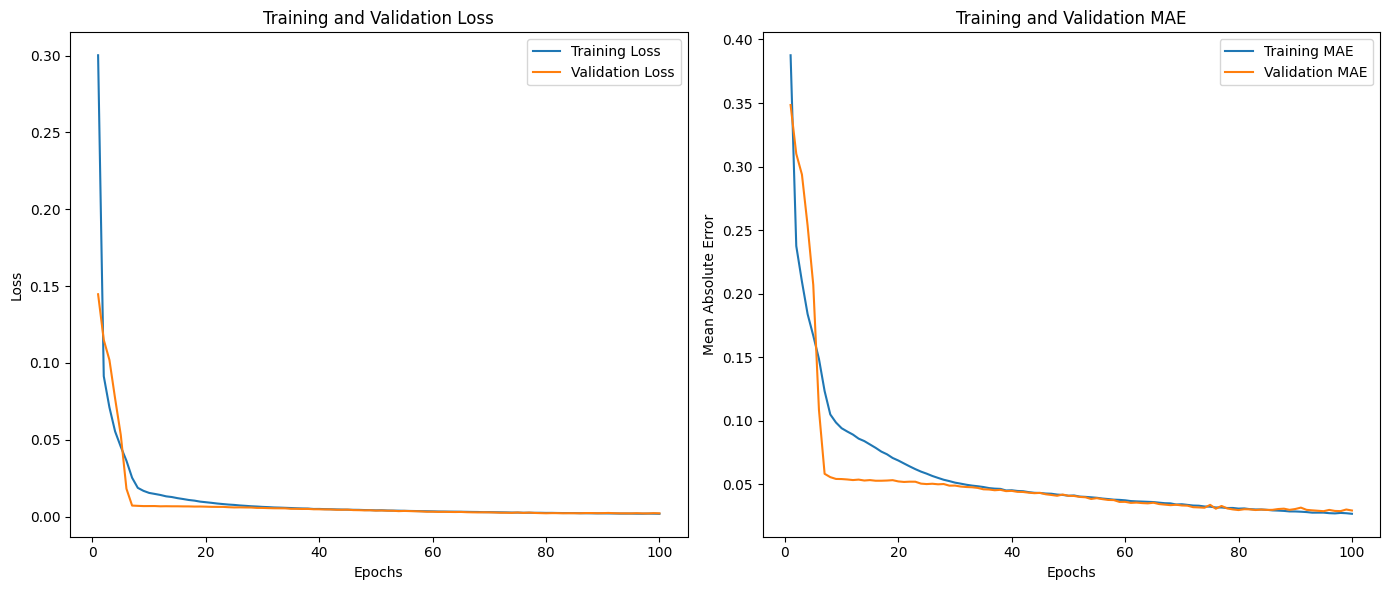

In [8]:
# Evaluating the optuna optimized NN on the test set
y_test_pred = best_model.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE for optuna optimized NN:", test_mse)

mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
evs = explained_variance_score(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred / y_test))) * 100

# Print the results
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Explained Variance Score:", evs)
print("Mean Absolute Percentage Error:", mape)

#some graph visualizations

# Ensure you have the 'history' object from model training
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']

# Plot the training and validation loss
plt.figure(figsize=(14, 6))

# Plot 1: Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot 2: Training and Validation MAE (Mean Absolute Error)
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, label='Training MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()